In [1]:
import os
from dataclasses import dataclass

from IPython.display import Markdown
from dotenv import load_dotenv
from azure.core.credentials import AzureKeyCredential
from azure.ai.documentintelligence import DocumentIntelligenceClient
from azure.ai.documentintelligence.models import (
    DocumentAnalysisFeature,
)
USE_DOC_INTEL_PREVIEW_VERSION = True
DOC_INTEL_MODEL_ID = "prebuilt-layout" # E.g. "prebuilt-read", "prebuilt-layout", or "prebuilt-document"

# Possible Document Intelligence features
# v4.0 (Preview): ['ocrHighResolution', 'languages', 'barcodes', 'formulas', 'styleFont', 'keyValuePairs', 'queryFields']
# v3.3 (GA):      ['ocrHighResolution', 'languages', 'barcodes', 'formulas', 'styleFont']
DOC_INTEL_FEATURES = ['ocrHighResolution', 'languages', 'styleFont']

DOC_INTEL_ENDPOINT = os.getenv("AZURE_DOCUMENT_INTELLIGENCE_ENDPOINT")
DOC_INTEL_API_KEY = os.getenv("AZURE_DOCUMENT_INTELLIGENCE_API_KEY")

In [2]:
pdf_path = "./QuestionBank/1.png"

In [3]:
import sys
import os
from dotenv import load_dotenv

load_dotenv("/home/azureuser/slm-fine-tune-private-domain-kb-generation/.env")
sys.path.append(os.path.abspath(os.path.join('..')))
markdown_img_tag_path_or_url = os.getenv("MARKDOWN_IMG_TAG_PATH_OR_URL")

import base64
from docProcess.azureDocIntellig import get_analyze_document_result

analyzedDocumentResult = await get_analyze_document_result(pdf_path)

In [4]:
from docProcess.customizedProcess.imgeDescriptionByLlmFigureProcessor import ImgeDescriptionByLlmFigureProcessor
from docProcess.azureDocIntelligResultPostProcessor import DocumentIntelligenceResultPostProcessor
from docProcess.fileTools import extract_pdf_page_images, load_pymupdf_pdf

# config the figure processor
figure_processor = ImgeDescriptionByLlmFigureProcessor(
    before_figure_text_formats=["*Figure Caption:* {caption}"],
    output_figure_img=True,
    figure_img_text_format="*Figure Content:*\n{content}",
    after_figure_text_formats=None
)

# config the post processor with markdown figure processor
doc_intel_result_processor = DocumentIntelligenceResultPostProcessor(
    figure_processor = figure_processor)

pdf = load_pymupdf_pdf(pdf_path=pdf_path, pdf_url=None)
doc_page_imgs = extract_pdf_page_images(pdf, img_dpi=100, starting_idx=1)

processed_content_docs = await doc_intel_result_processor.process_analyze_result(
        analyzedDocumentResult,
        doc_page_imgs=doc_page_imgs
    )


2025-05-12 07:16:55,214 - INFO - HTTP Request: POST https://openai-hu-east-us2.openai.azure.com/openai/deployments/gpt-4o/chat/completions?api-version=2024-10-21 "HTTP/1.1 200 OK"


*Page 1 content:*

从所给的四个选项中,选择最合适的一个填入问号处,使之呈现一定的规律性()
![](388c018a28d935a74620b2d8b2fcb16d_img.png) 
  the image's description by larage language mode: 该图呈现了一个逻辑规律推理问题，由3x3的黑白圆点矩阵构成，其中最后一个空白区域需要通过观察规律进行填充。上方包含3行，每行3列黑白圆点分布的正方形模块，而底部列出了四个选项（A、B、C、D）。用户需根据图案中黑白圆点排列的规律选择一个最合适的选项填入问号处，从而使整体呈现一定的规律性。 

A
B
C
D


*Page 1 Image:*

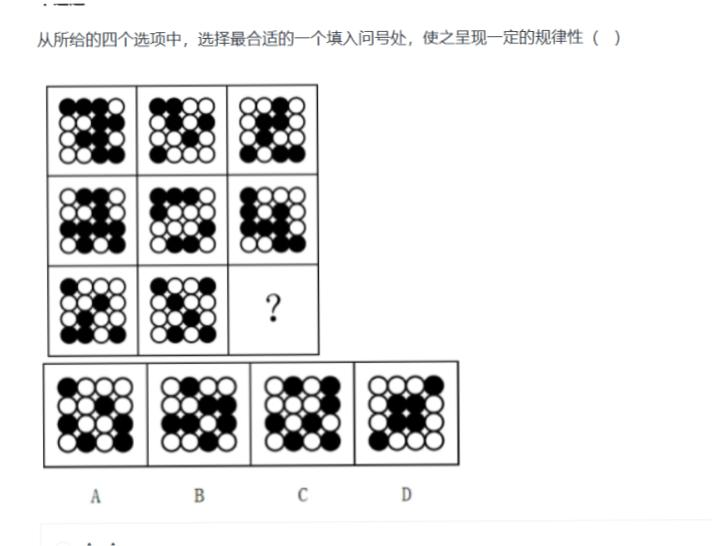

In [5]:
from docProcess.docIntelligElementTools import convert_processed_di_docs_to_markdown

processed_content_md = await convert_processed_di_docs_to_markdown(processed_content_docs, default_text_merge_separator="\n")

Markdown(processed_content_md)

In [ ]:
Markdown("*Page 1 content:*\n\n从所给的四个选项中,选择最合适的一个填入问号处,使之呈现一定的规律性()\n ![](/home/azureuser/slm-fine-tune-private-domain-kb-generation/processed_documents/img/388c018a28d935a74620b2d8b2fcb16d_img.png) \n  the image's description by larage language mode: 该图片展示了一个逻辑推理题，由一个包含三个横排和三个纵列的矩阵组成，每个格子包含黑白圆形的特定排列。图片的最后一个位置标有问号 (?)，表示需要选择一个符合规律的选项填入空缺。下方列出了四个备选项 (A、B、C、D)，分别显示不同排列方式的黑白圆形图案。\n\n通过观察前两个横排或纵列图案的逻辑，可以得出特定变化的规律，例如黑白圆形的排列方式可能与旋转、镜像或某种特定规则有关。答案需匹配图案的规律性并填入问号所在位置。\n\n此图适用于考察问题解决能力与逻辑分析能力。 \n\nA\nB\nC\nD\n\n\n")

"*Page 1 content:*\n\n从所给的四个选项中,选择最合适的一个填入问号处,使之呈现一定的规律性()\n![](388c018a28d935a74620b2d8b2fcb16d_img.png) \n  the image's description by larage language mode: 该图片展示了一个逻辑推理题，由一个包含三个横排和三个纵列的矩阵组成，每个格子包含黑白圆形的特定排列。图片的最后一个位置标有问号 (?)，表示需要选择一个符合规律的选项填入空缺。下方列出了四个备选项 (A、B、C、D)，分别显示不同排列方式的黑白圆形图案。\n\n通过观察前两个横排或纵列图案的逻辑，可以得出特定变化的规律，例如黑白圆形的排列方式可能与旋转、镜像或某种特定规则有关。答案需匹配图案的规律性并填入问号所在位置。\n\n此图适用于考察问题解决能力与逻辑分析能力。 \n\nA\nB\nC\nD\n\n\n"